In [33]:
# Example Machine Learn 

# bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import statistics as sts
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from  sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [3]:
df = pd.read_csv('exemplo2.csv')
df.head()

,idade,conta_corrente,risco
0,21.257389,783.127911,ruim
1,21.766573,979.747521,bom
2,25.321033,1065.328054,ruim
3,23.919268,1195.758078,bom
4,21.805298,1083.764450,bom


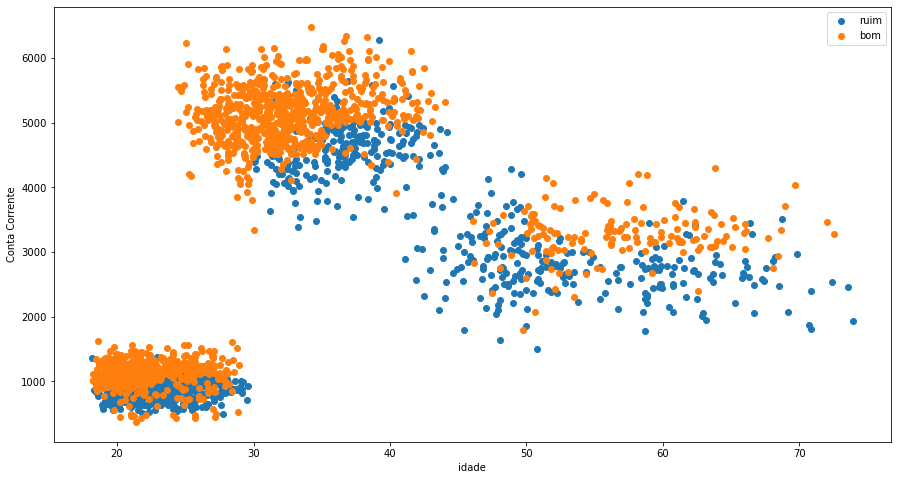

In [4]:
plt.figure(figsize=(15,8))
plt.scatter(df[df.risco=='ruim'].idade, df[df.risco=='ruim'].conta_corrente)
plt.scatter(df[df.risco=='bom'].idade, df[df.risco=='bom'].conta_corrente)
plt.xlabel('idade')
plt.ylabel('Conta Corrente')
plt.legend(['ruim', 'bom'])

In [10]:
X = df.drop('risco',axis = 1 )  # eliminando a coluna risco do df
y = df.risco  # usando apenas a coluna risco
knn = KNeighborsClassifier(n_neighbors = 3) # classificar
knn.fit(X,y) # treinando com a vizinhança = 3 

KNeighborsClassifier(n_neighbors=3)

In [11]:
# Fazendo a previsão
knn.predict([[18, 1000]])  # Realizando um exemplo, ou seja, 
# preveja qual a qualidade do cliente se ele tem 18(idade) anos e 1000 reais

C:\Users\Rodolfo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['bom'], dtype=object)

In [25]:
# Fazendo o procedimento de treino e teste 
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, train_size =2/3)
knn2 = KNeighborsClassifier(n_neighbors = 3)                                                    
knn2.fit(X_treino,y_treino)
accuracy_score(y_teste, knn2.predict(X_teste))  # precisão do modelo 

0.8069544364508393

In [27]:
# observamos um desempenho de 80% de precisão 
# Realizando o pré processamento

In [30]:
# Normalizador
norm = MinMaxScaler()  # faz transformações
X_norm = norm.fit_transform(X)
X_norm


array([[0.05586473, 0.06720224],
       [0.06499436, 0.09938945],
       [0.12872564, 0.11339923],
       ...,
       [0.85424954, 0.36522222],
       [0.62401886, 0.42781034],
       [0.61473291, 0.54031447]])

In [31]:
# Usando o X normalizado 
X_treino, X_teste, y_treino, y_teste = train_test_split(X_norm, y, train_size =2/3)
knn3 = KNeighborsClassifier(n_neighbors = 3)                                                    
knn3.fit(X_treino,y_treino)
accuracy_score(y_teste, knn3.predict(X_teste))  # precisão do modelo 

0.8405275779376499

In [32]:
novo_cliente = [[18,800]]   #prevendo para um novo cliente 
X_new = norm.transform(novo_cliente)
knn3.predict(X_new)

C:\Users\Rodolfo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array(['ruim'], dtype=object)